# Business case

To predict sales depending on amount invested for advertisement in TV, Radio, Newspaper

# Domain Analysis

TV: Amount invested for advertisment in TV  
Radio: Amount invested for advertisment in Radio  
Newspaper: Amount invested for advertisment in Newspaper  
Sales: Total sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Basic Checks

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

### Univariate Analysis

<Axes: xlabel='TV', ylabel='Count'>

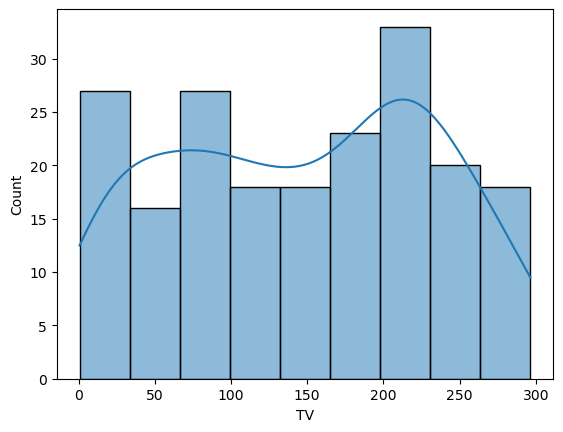

In [13]:
sns.histplot(x = df.TV, kde = True)

Insights:

<Axes: xlabel='Radio', ylabel='Count'>

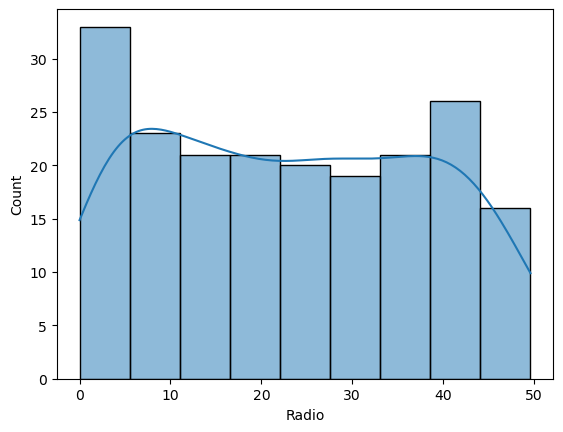

In [14]:
sns.histplot(x = df.Radio, kde = True)

Insights:

<Axes: xlabel='Newspaper', ylabel='Count'>

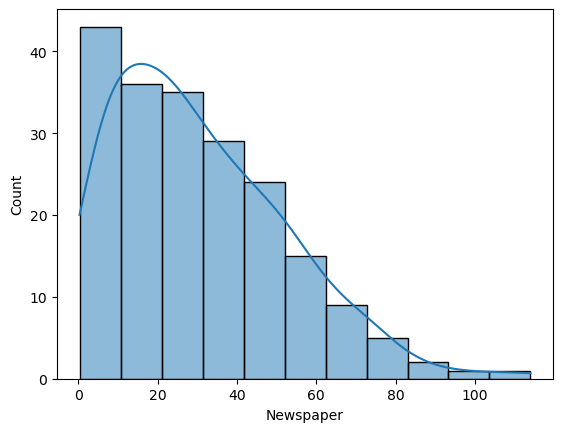

In [15]:
sns.histplot(x = df.Newspaper, kde = True)

Insights:

### Bivariate Analysis

<Axes: xlabel='TV', ylabel='Sales'>

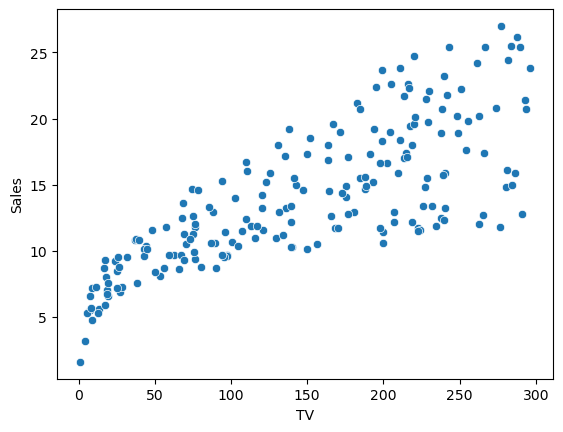

In [16]:
sns.scatterplot(x = df.TV, y = df.Sales)

Insights:

<Axes: xlabel='Radio', ylabel='Sales'>

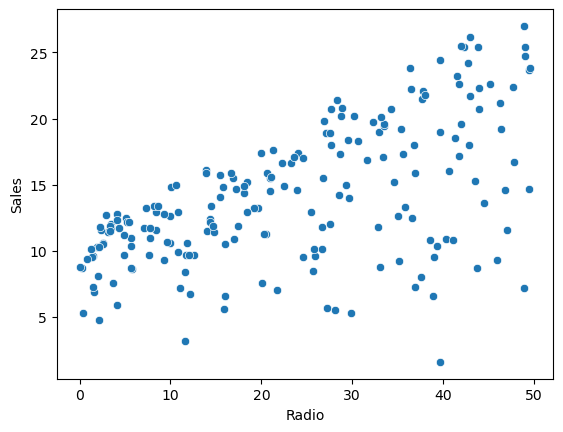

In [17]:
sns.scatterplot(x = df.Radio, y = df.Sales)

Insights:

<Axes: xlabel='Newspaper', ylabel='Sales'>

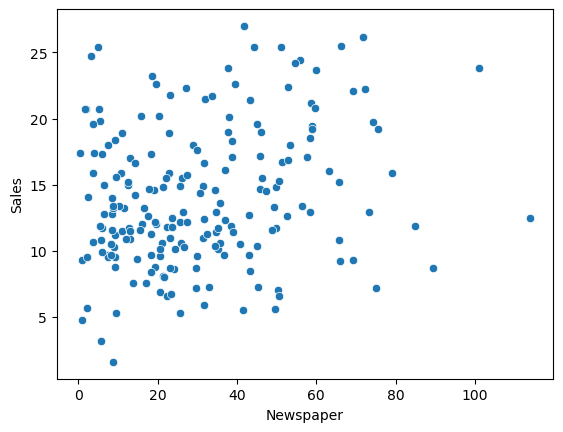

In [18]:
sns.scatterplot(x = df.Newspaper, y = df.Sales)

Insights:

# Data Preprocessing

### Handling with null values

In [20]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Handling with outliers

<Axes: xlabel='TV'>

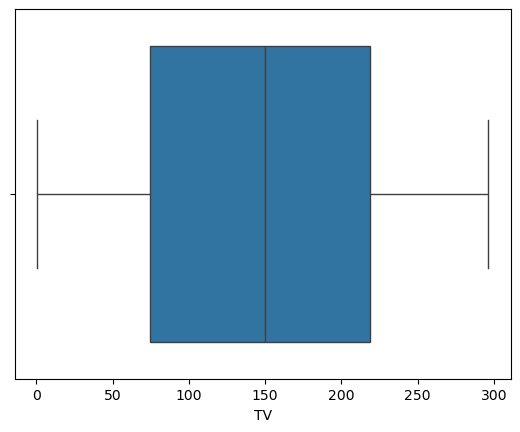

In [21]:
sns.boxplot(x = df.TV)

<Axes: xlabel='Radio'>

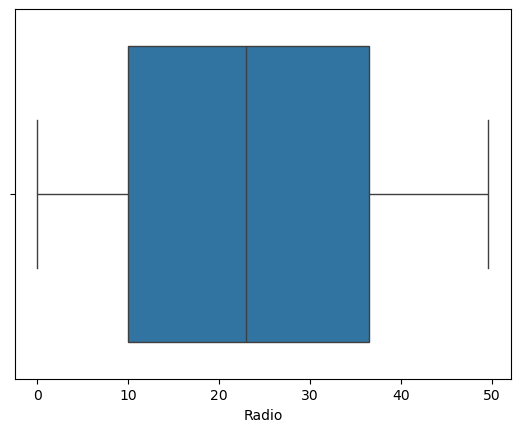

In [22]:
sns.boxplot(x = df.Radio)

<Axes: xlabel='Newspaper'>

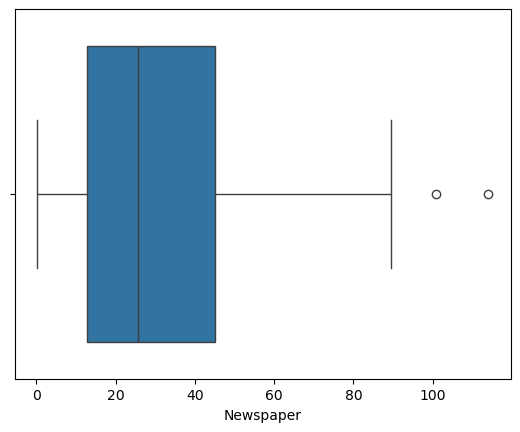

In [23]:
sns.boxplot(x = df.Newspaper)

In [33]:
df.loc[df.Newspaper>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [28]:
np.median(df.Newspaper)

25.75

In [35]:
df.loc[df.Newspaper>90, 'Newspaper'] = np.median(df.Newspaper)

In [36]:
df.loc[[16,101]]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,25.75,12.5
101,296.4,36.3,25.75,23.8


In [ ]:
# No categorical data
# Scaling
# Balancing

# Feature Selection

In [37]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

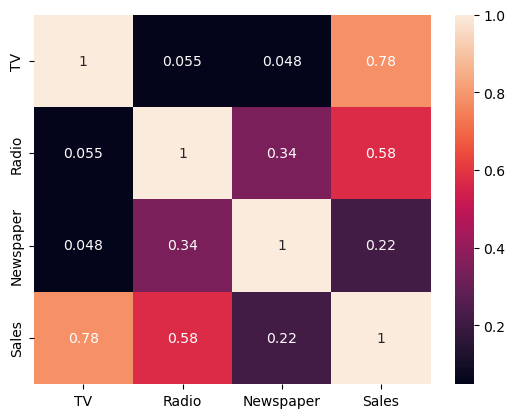

In [39]:
sns.heatmap(df.corr(), annot=True)

# Model Creation

In [42]:
x = df[['TV', 'Radio', 'Newspaper']]

# x = df.drop('Sales', axis = 1)

In [43]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [44]:
y = df.Sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [83]:
x_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [84]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.90
15,195.4,47.7,52.90
30,292.9,28.3,43.20
158,11.7,36.9,45.20
128,220.3,49.0,3.20
115,75.1,35.0,52.70
69,216.8,43.9,27.20
170,50.0,11.6,18.40
174,222.4,3.4,13.10
45,175.1,22.5,31.50


In [86]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [87]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [88]:
LR.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = LR.predict(x_test)
y_pred

array([16.37516878, 20.92223369, 21.61337898, 10.48546649, 22.20303253,
       13.01791749, 21.11420367,  7.31962728, 13.57228717, 15.12291625,
        8.93946863,  6.49261545, 14.26701237,  8.7842258 ,  9.58212372,
       12.08817162,  8.58994144, 16.26413221, 10.16673733, 18.87228047,
       19.56143279, 12.93858841, 12.26579131, 21.33586587,  7.70676623,
        5.64346817, 20.80490942, 11.91827415,  9.06398829,  8.38798291,
       12.40795381,  9.89916746, 21.42171662, 12.11530527, 18.28438126,
       20.2013917 , 14.01217105, 20.88906686, 10.94242836,  4.38355012,
        9.58099984, 12.6268183 ,  9.93592621,  8.07030243, 13.45825686,
        5.25875537,  9.14511273, 14.10280757,  8.70203985, 11.55985811])

In [92]:
np.array(y_test)

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9, 11. , 12.8, 10.1,  9.7,
       11.6,  7.6, 10.5, 14.6, 10.4, 12. ])

# Model Evaluation

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
mse = mean_squared_error(y_test, y_pred)
mse

2.8700070259523507

In [96]:
import math
rmse = math.sqrt(mse)
rmse

1.694109508252743

In [97]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.3956722398171346

In [100]:
r2 = r2_score(y_test, y_pred)
r2

0.8938866815336232

In [103]:
adj_r2 = 1-(1-r2)*(50-1)/(50-3-1)
adj_r2

0.8869662477205986